In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import os
drc = '/content/gdrive/MyDrive/Plant Leaf Images'
path,dirs,files = next(os.walk('/content/gdrive/MyDrive/Plant Leaf Images'))
file_count = len(files)
print('Number of images:',file_count)

Number of images: 235


In [ ]:
files_name = os.listdir(drc)
print(files_name)

['alo53.jpg', 'alo39.jpg', 'alo71.jpg', 'alo44.jpg', 'alo77.jpg', 'alo12.jpg', 'alo3.jpg', 'alo64.jpg', 'alo105.jpg', 'alo107.jpg', 'alo76.jpg', 'alo89.jpg', 'alo41.jpg', 'alo6.jpg', 'alo93.jpg', 'alo118.jpg', 'alo14.jpg', 'alo115.jpg', 'alo104.jpg', 'alo45.jpg', 'alo101.jpg', 'alo81.jpg', 'alo49.jpg', 'alo112.jpg', 'alo55.jpg', 'alo79.jpg', 'alo80.jpg', 'alo96.jpg', 'alo17.jpg', 'alo91.jpg', 'alo66.jpg', 'alo27.jpg', 'alo46.jpg', 'alo59.jpg', 'alo87.jpg', 'alo34.jpg', 'alo19.jpg', 'alo43.jpg', 'alo111.jpg', 'alo65.jpg', 'alo2.jpg', 'alo68.jpg', 'alo86.jpg', 'alo23.jpg', 'alo48.jpg', 'alo5.jpg', 'alo109.jpg', 'alo62.jpg', 'alo47.jpg', 'alo18.jpg', 'alo11.jpg', 'alo54.jpg', 'alo102.jpg', 'alo90.jpg', 'alo57.jpg', 'alo63.jpg', 'alo36.jpg', 'alo61.jpg', 'alo70.jpg', 'alo94.jpg', 'alo37.jpg', 'alo113.jpg', 'alo30.jpg', 'alo33.jpg', 'alo13.jpg', 'alo58.jpg', 'alo31.jpg', 'alo51.jpg', 'alo99.jpg', 'alo114.jpg', 'alo98.jpg', 'alo24.jpg', 'alo103.jpg', 'alo117.jpg', 'alo52.jpg', 'alo8.jpg', 'a

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model

from tensorflow.keras import  layers, models
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# DEEP LEARNING IMPORTS
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation,Flatten, MaxPooling2D

In [ ]:
file_n = os.listdir(drc)
for i in range(len(file_n)):
  name = file_n[i]
  print(name[0:3])

alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
alo
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad
bad


In [ ]:
file_names = os.listdir(drc)
aloeveraLeaf_count = 0
badipaliLeaf_count = 0

for img_file in file_names:
  name = img_file[0:3]

  if name == 'alo':
    aloeveraLeaf_count += 1
  else:
    badipaliLeaf_count +=1

print('Number of mango leves:',aloeveraLeaf_count)
print('Number of javaPlum leves:',badipaliLeaf_count)

Number of mango leves: 118
Number of javaPlum leves: 117


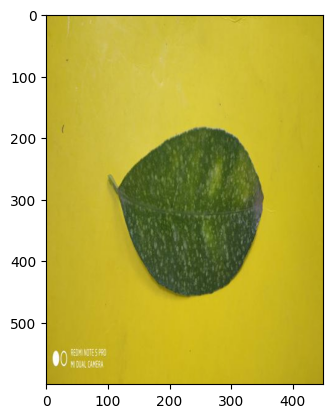

In [ ]:
img = mpimg.imread('/content/gdrive/MyDrive/Plant Leaf Images/bad110.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
labels = []
filenames = os.listdir('/content/gdrive/MyDrive/Plant Leaf Images')

for i in range(len(filenames)):
  file_name = filenames[i]
  label = file_name[0:3]

  if label =='alo':
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
print(labels[:10])
print(len(labels))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
235


In [ ]:
values,counts = np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[117 118]


In [ ]:
import cv2
import glob


In [ ]:
image_diroctory = '/content/gdrive/MyDrive/Plant Leaf Images'
image_extension = ['png','jpg','jpeg']

files = []

[files.extend(glob.glob(image_diroctory + '/' +'*.' + e)) for e in image_extension]

resized_dataset_images = []
for file_path in files:
    img = cv2.imread(file_path)

    img_tensor = tf.convert_to_tensor(img, dtype=tf.float32)
    resized_img = tf.image.resize(img_tensor, (224, 224))
    resized_dataset_images.append(resized_img)

dataset_images = tf.stack(resized_dataset_images).numpy()

In [ ]:
print(dataset_images)
print(len(dataset_images))

[[[[ 81.49554   101.49554   119.49554  ]
   [ 79.48661    99.48661   117.48661  ]
   [ 77.47768    97.47768   115.47768  ]
   ...
   [141.47766   144.47766   149.47766  ]
   [142.4866    145.4866    150.4866   ]
   [143.        146.        151.       ]]

  [[ 79.48214    99.48214   117.48214  ]
   [ 77.96875    97.96875   115.96875  ]
   [ 77.         97.        115.       ]
   ...
   [141.47766   144.47766   149.47766  ]
   [142.4866    145.4866    150.4866   ]
   [143.        146.        151.       ]]

  [[ 77.3982     97.3982    115.3982   ]
   [ 76.39103    96.39103   114.39103  ]
   [ 76.52232    96.52232   114.52232  ]
   ...
   [141.47766   144.47766   149.47766  ]
   [142.4866    145.4866    150.4866   ]
   [143.        146.        151.       ]]

  ...

  [[ 53.115185   59.115185   78.11519  ]
   [ 50.135788   56.135788   75.13579  ]
   [ 60.499943   66.49995    85.49995  ]
   ...
   [120.00898   120.00898   120.00898  ]
   [119.39282   119.39282   119.39282  ]
   [118.19641   

In [ ]:
print(dataset_images.shape)

(235, 224, 224, 3)


In [ ]:
X = dataset_images
y = np.asarray(labels)

In [ ]:
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

In [ ]:
print(dataset_images.shape)

(235, 224, 224, 3)


In [ ]:
X = dataset_images
y = np.asarray(labels)

In [ ]:
print(len(y))
print(len(dataset_images))

235
235


In [ ]:
X_train_scalled = X_train/255
X_test_scalled = X_test/255

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (224,224,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(2)
])

In [ ]:
from sklearn import metrics

In [ ]:
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = cnn.fit(X_train_scalled, y_train, epochs=8,
                    validation_data=(X_test_scalled, y_test))

Epoch 1/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.4764 - loss: 2.9207 - val_accuracy: 0.5070 - val_loss: 0.6872
Epoch 2/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6046 - loss: 0.6643 - val_accuracy: 0.5915 - val_loss: 0.6370
Epoch 3/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.7388 - loss: 0.5929 - val_accuracy: 0.4789 - val_loss: 0.8506
Epoch 4/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5886 - loss: 0.7459 - val_accuracy: 0.8169 - val_loss: 0.4899
Epoch 5/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8908 - loss: 0.4232 - val_accuracy: 0.8451 - val_loss: 0.3984
Epoch 6/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7683 - loss: 0.4645 - val_accuracy: 0.8873 - val_loss: 0.3522
Epoch 7/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9679 - loss: 0.2352 - val_accuracy: 0.8732 - val_loss: 0.2949
Epoch 8/8
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9671 - loss: 0.1616 - val_accuracy: 0.9014 - val_loss: 0.2198


3/3 - 3s - 838ms/step - accuracy: 0.9014 - loss: 0.2198


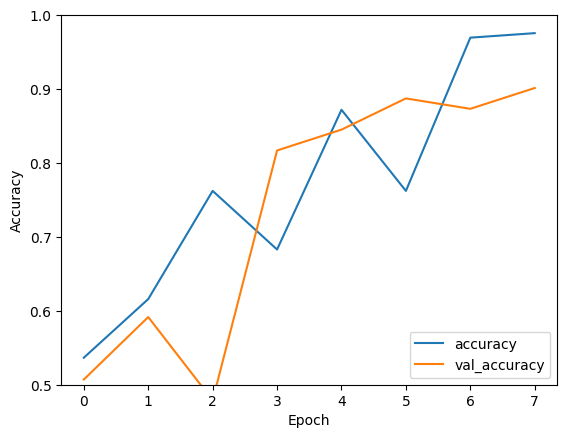

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn.evaluate(X_test_scalled,  y_test, verbose=2)

In [ ]:
cnn.evaluate(X_test_scalled,y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 572ms/step - accuracy: 0.8921 - loss: 0.2303


[0.21977970004081726, 0.9014084339141846]

In [ ]:
y_test = y_test.reshape(-1)

In [ ]:
y_pred = cnn.predict(X_test_scalled)
y_pred[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 731ms/step


array([[1.6690794 , 4.009219  ],
       [6.8184457 , 0.21041451],
       [1.5827315 , 5.8830447 ],
       [4.28361   , 1.7370799 ],
       [2.6729326 , 5.12723   ]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]

In [ ]:
print('Classification Report:\n', classification_report(y_test,y_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90        34
           1       0.89      0.92      0.91        37

    accuracy                           0.90        71
   macro avg       0.90      0.90      0.90        71
weighted avg       0.90      0.90      0.90        71

